# Building Regression Classifier

In this activity, we're going to use decision trees to determine the redshifts of galaxies from their photometric colours. We'll use galaxies where accurate spectroscopic redshifts have been calculated as our gold standard. We will learn how to assess the accuracy of the decision trees predictions and have a look at validation of our model.

We will be using flux magnitudes from the Sloan Digital Sky Survey (SDSS) catalogue to create colour indices. Flux magnitudes are the total flux (or light) received in five frequency bands (u, g, r, i and z).

<img src="imgs/plot_sdss_filters_11.png"/>

The astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.

When you say that a star has a certain magnitude, you must specify the color that the magnitude refers to. The magnitudes given above are magnitudes for yellow light.

SDSS measures magnitudes in five different colors by taking images through five color filters. A filter is a kind of screen that blocks out all light except for light with a specific color. The SDSS telescope's filters are green (g), red (r), and three colors that correspond to light not visible to the human eye: ultraviolet (u), and two infrared wavelengths (i and z). On SkyServer, the five magnitudes (through the five filters) of a star are symbolized by u, g, r, i, and z. The astronomers who planned the SDSS chose these filters to view a wide range of colors, while focusing on the colors of interesting celestial objects.

Color is symbolized by subtracting the magnitudes: u-g, g-r, r-i, and so on. Remember that all these quantities involve magnitude, so they decrease with increasing light output. A star with a high g-r color is redder than a star with a low g-r color.

Credit: https://skyserver.sdss.org/dr1/en/proj/advanced/color/amounts.asp

## Color and Amounts of Light

The physical property that magnitude actually measures is radiant flux - the amount of light that arrives in a given area on Earth in a given time. Since color is measured by magnitude, a star's color also depends on how much light arrives at Earth. Radiant flux is the physical basis for color.

The definition of magnitude $m$ in terms of radiant flux $F$ is:

$$m = -log_{2.51}(F/F_{Vega})$$

The star Vega in the northern hemisphere constellation Lyra is used as the standard for the magnitude system, so $F_{Vega}$ means the amount of light arriving at Earth in a given time from Vega. This definition means that Vega's magnitude is set at zero through all filters.

This does not mean that Vega looks the same through all filters; it just means that astronomers have agreed to use Vega as the zero point for the magnitude scale, much like the freezing point of water is used as the zero point for the Celsius temperature scale. There's nothing special about Vega that made astronomers choose it as the zero point. They had to choose something... so why not Vega?

The negative sign in the definition ensures that brighter stars have smaller magnitudes. So if Earth receives less light from a certain star than from Vega (through a given filter), that star's magnitude will be positive. If Earth receives more light from a certain star than from Vega, that star's magnitude will be negative.

## Redshift

To calculate the redshift of a distant galaxy, the most accurate method is to observe the optical emission lines and measure the shift in wavelength. However, this process can be time consuming and is thus infeasible for large samples.

For many galaxies we simply don't have spectroscopic observations.

Instead, we can calculate the redshift by measuring the flux using a number of different filters and comparing this to models of what we expect galaxies to look like at different redshifts.

In this activity, we will use machine learning to obtain photometric redshifts for a large sample of galaxies. We will use the colour indices (u-g, g-i, r-i and i-z) as our input and a subset of sources with spectroscopic redshifts as the training dataset.

In [1]:
import numpy as np

In [2]:
def get_features_targets(data):
    ug = data['u'] - data['g']
    gr = data['g'] - data['r']
    ri = data['r'] - data['i']
    iz = data['i'] - data['z']
    return np.column_stack((ug,gr,ri,iz)),data['redshift']

In [26]:
data = np.load('data/sdss_galaxy_colors.npy')
x = get_features_targets(data)

In [30]:
features, targets = x

ValueError: not enough values to unpack (expected 3, got 2)

In [13]:
data[0]

(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301, 6.543622e-05)

## Decision Tree

The inputs to our decision tree are the colour indices from photometric imaging and our output is a photometric redshift. Our training data uses accurate spectroscopic measurements.

The decision tree will look something like the following.

<img src="imgs/decisiontree_1.png" />

We can see how our calculated colour indices are input as features at the top and through a series of decision nodes a target redshift value is reached and output.

We will be using the Python machine learning library scikit-learn which provides several machine learning algorithms.

The scikit-learn decision tree regression takes a set of input features and the corresponding target values, and constructs a decision tree model that can be applied to new data.

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(data)

In [20]:
qso = df[df["spec_class"] == b'QSO']

Text(0,0.5,'g')

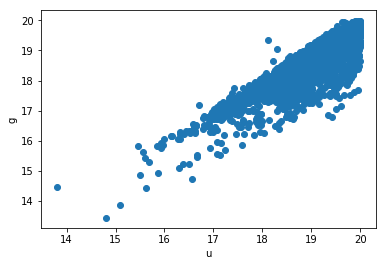

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(qso["u"],qso["g"])
plt.xlabel("u")
plt.ylabel("g")

We are now going to use our features and targets to train a decision tree and then make a prediction. We are going to use the DecisionTreeRegressor class from the sklearn.tree module.

The decision tree regression learning algorithm is initialised with:

In [33]:
from sklearn.tree import DecisionTreeRegressor
# initialize model
dtr = DecisionTreeRegressor()

In [34]:
# train the model
dtr.fit(features, targets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
# make predictions using the same features
predictions = dtr.predict(features)
# print out the first 4 predicted redshifts
print(predictions[:4])

[0.539301   0.1645703  0.04190006 0.04427702]


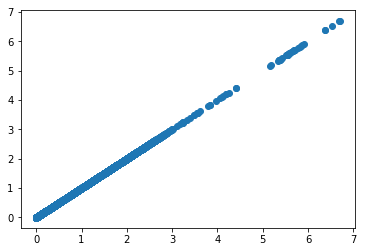

In [38]:
# accuracy mean absolute value
import matplotlib.pyplot as plt
plt.scatter(predictions,targets)


In [26]:
# paste your median_diff function here
def median_diff(predicted, actual):
    return np.median(abs(predicted-actual))

# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
    # split the data into training and testing features and predictions
    split = features.shape[0]//2
    train_features = features[:split]
    test_features = features[split:]
  
    model.fit(train_features, targets[:split])
    # make predictions using the same features
    predictions = model.predict(test_features)
   
    # use median_diff function to calculate the accuracy
    return median_diff(targets[split:], predictions)

In [27]:
features, targets = get_features_targets(data)
# initialize model
dtr = DecisionTreeRegressor()

# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.021938


## Analayzing the data

In [28]:
df["ug"] = df["u"] -  df["g"]
df["ri"] = df["r"] -  df["i"]

In [29]:
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


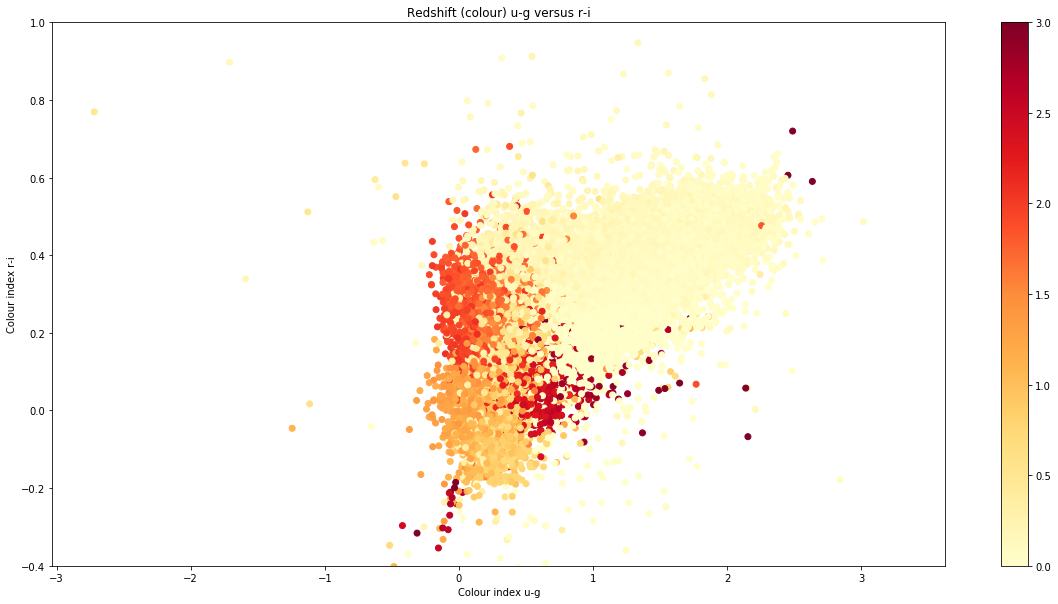

In [56]:
fig = plt.figure()
sc = plt.scatter(df["ug"],df["ri"], c=df["redshift"],vmin=0,vmax=3,cmap = plt.get_cmap("YlOrRd"))
cbar = fig.colorbar(sc)
ax = fig.add_subplot(111)
ax.set_title("Redshift (colour) u-g versus r-i")
ax.set_ylabel('Colour index r-i')
ax.set_xlabel('Colour index u-g')
ax.set_ylim(-0.4, 1)
fig.set_size_inches((20,10))

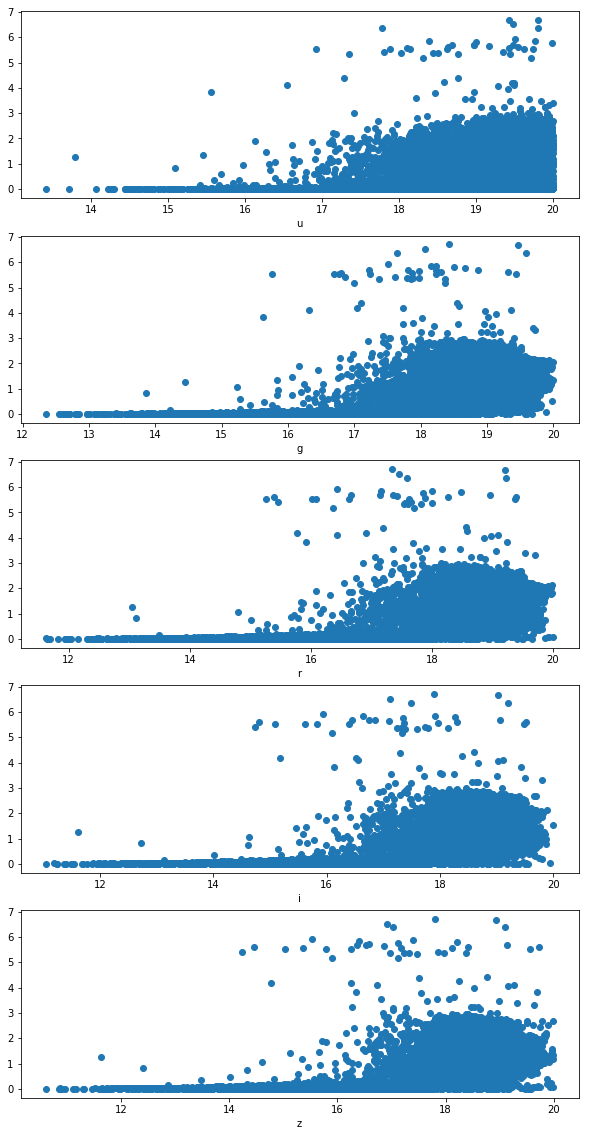

In [25]:
columns = ["u","g","r","i","z"]
fig , ax = plt.subplots(nrows=len(columns))
fig.set_size_inches((10,4*len(columns)))
for i,c in enumerate(columns):
    ax[i].scatter(df[c],df["redshift"])
    ax[i].set_xlabel(c)

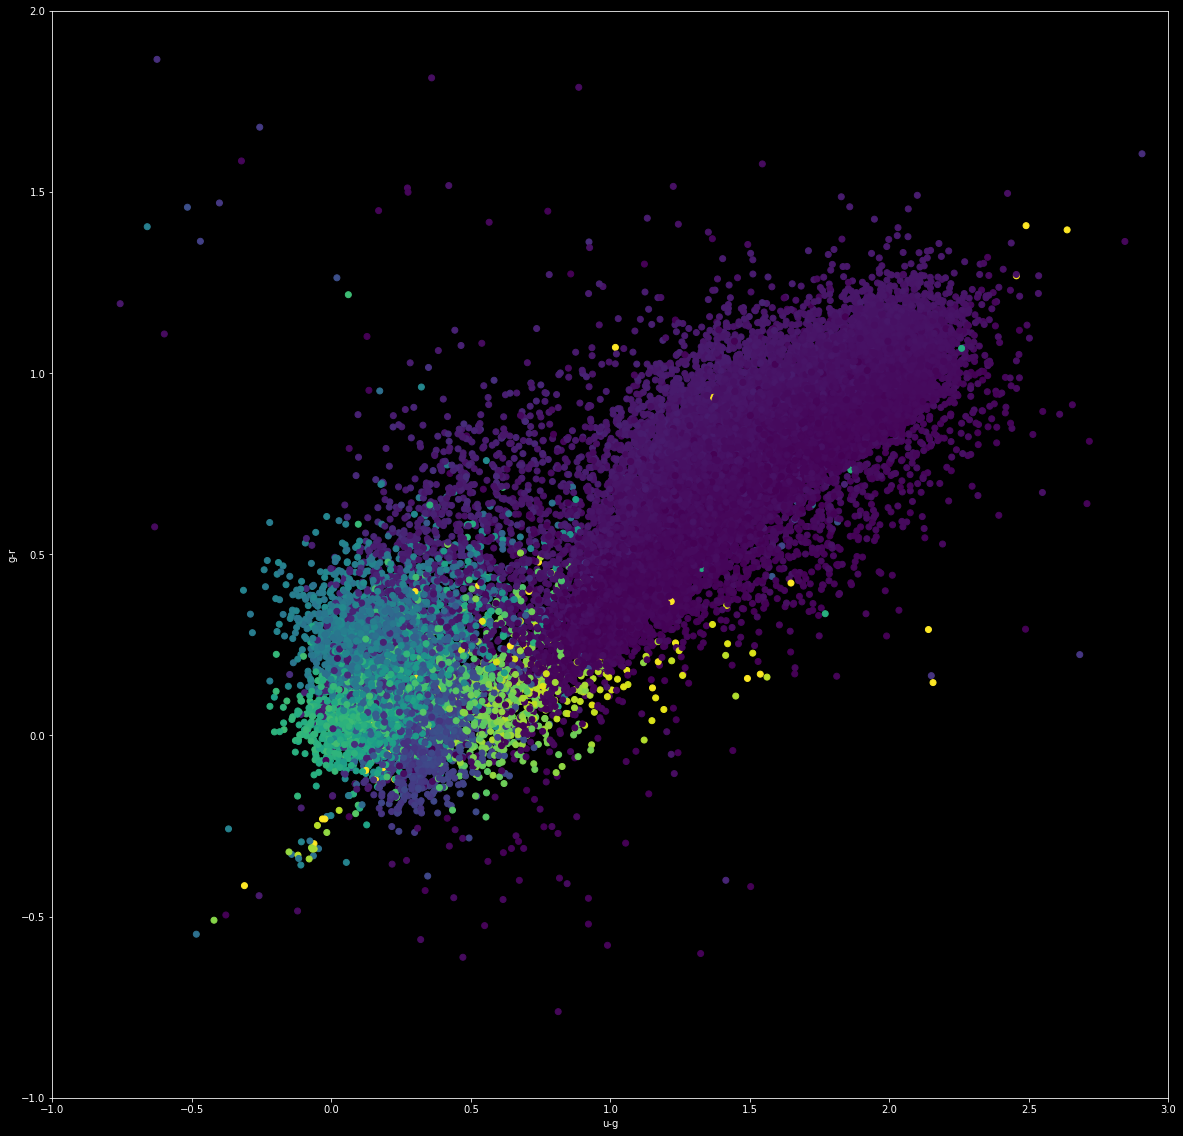

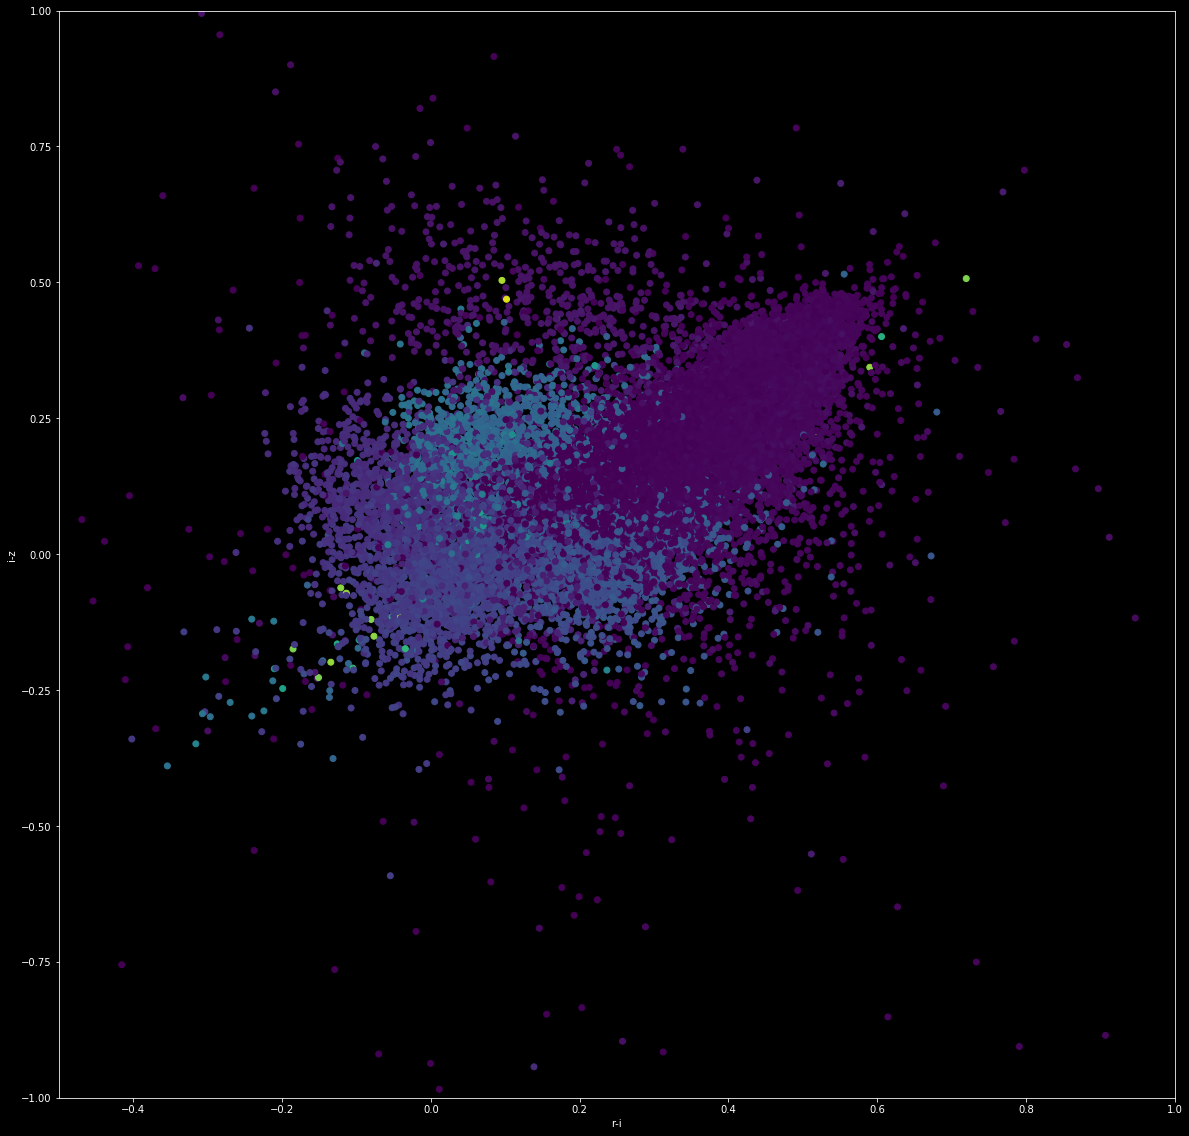

In [59]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from astroML.datasets import fetch_moving_objects
from astroML.plotting.tools import devectorize_axes


def black_bg_subplot(*args, **kwargs):
    """Create a subplot with black background"""

    if int(matplotlib.__version__[0]) >= 2:
        kwargs['facecolor'] = 'k'
    else:
        kwargs['axisbg'] = 'k'

    ax = plt.subplot(*args, **kwargs)

    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')

    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')

    return ax

ug = df["u"] - df["g"]
gr = df["g"] - df["r"]
ri = df["r"] - df["i"]
iz = df["i"] - df["z"]

color = df["redshift"]


# plot the color-magnitude plot
fig = plt.figure(facecolor='k')
ax = black_bg_subplot(111)
ax.scatter(ug, gr,
           c=color, vmin=0,vmax=3)
#devectorize_axes(ax, dpi=100)

fig.set_size_inches((20,20))


ax.set_xlabel('u-g', color='w')
ax.set_ylabel('g-r', color='w')
ax.set_xlim(-1,3)
ax.set_ylim(-1,2)

# plot the orbital parameters plot
fig = plt.figure(facecolor='k')
ax = black_bg_subplot(111)
ax.scatter(ri, iz,
           c=color)
#devectorize_axes(ax, dpi=400)


ax.set_xlabel('r-i', color='w')
ax.set_ylabel('i-z', color='w')

ax.set_xlim(-0.5,1)
ax.set_ylim(-1,1)
fig.set_size_inches((20,20))

In [ ]:
import scipy
x, y, z = ug,ri,color
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()